# Objective

The objective of this project is to build a machine learning model that can predict a person's salary based on a set of variables related to their work experience, seniority, job type, employment conditions, and organizational context, as well as certain demographic and job mobility characteristics.

# Importing Libraries

In [1]:
import pandas as pd ## to import the dataset and analyze it
import matplotlib.pyplot as plt ## for statistical graphs
import seaborn as sns ## for statistical graphs
import numpy as np ## for work with matrices
from sklearn.model_selection import train_test_split ## for split the dataset

# Reading the dataset

In [2]:
url = "https://raw.githubusercontent.com/caro6852lq/MachineLearning_PredictSalary/main/Data/2025.2%20-%20Sysarmy%20-%20Encuesta%20de%20remuneraci%C3%B3n%20salarial%20Argentina%20-%20Sysarmy%20-%20sueldos%20-%202025.02CLEAN.csv"

In [3]:
df = pd.read_csv(url, skiprows=9) ## The file has header and rows that do not contain data

In [4]:
df.head(2) 

,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos,ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,tuviste_actualizaciones_de_tus_ingresos_laborales_durante_el_ultimo_semestre,...,salir_o_seguir_contestando_sobre_las_guardias1,tenes_guardias,cuanto_cobras_por_guardia,aclara_el_numero_que_ingresaste_en_el_campo_anterior,tengo_edad,genero,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
0,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),2511178.0,2085000.0,Cobro parte del salario en dólares,Dólar oficial al día de oago,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,43,Mujer Cis,No,True,Semi-Senior,2511178.0
1,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,2140000.0,2140000.0,Cobro todo el salario en dólares,1160,No,No recibo bono,Uno,...,NaN,NaN,NaN,NaN,59,Mujer Cis,Sí,True,Senior,2140000.0


In [5]:
df.shape #check of quantity of columns and rows

(3748, 56)

In [6]:
df.info() # check data type by columns and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 56 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   donde_estas_trabajando                                                                         3748 non-null   object 
 1   dedicacion                                                                                     3748 non-null   object 
 2   tipo_de_contrato                                                                               3748 non-null   object 
 3   ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos                                      3748 non-null   float64
 4   ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos                                       3580 non-null   float64
 5   pagos_en_dolares    

In [7]:
df0 = df #backup

In [8]:
# Selected columns
columnas = ['donde_estas_trabajando', 
            'dedicacion', 
            'tipo_de_contrato',
       'trabajo_de',
       'anos_de_experiencia',
        'anos_en_el_puesto_actual',
        'antiguedad_en_la_empresa_actual',
        'cuantas_personas_tenes_a_cargo',
        'tengo_edad',
       'genero', 
        'seniority',
        '_sal','modalidad_de_trabajo',
'cantidad_de_personas_en_tu_organizacion',
           'recibis_algun_tipo_de_bono',
           'contas_con_beneficios_adicionales',
           'sueldo_dolarizado']

In [9]:
df = df[columnas]

In [10]:
df.shape

(3748, 17)

# Data Cleaning

In [11]:
mapeo = {
    "donde_estas_trabajando": "provincia", 
    "trabajo_de": "puesto",
    "cantidad_de_personas_en_tu_organizacion": "tamanio_empresa",
    "tengo_edad":"edad"
}

In [12]:
df = df.rename(columns=mapeo)

In [13]:
df.head()

,provincia,dedicacion,tipo_de_contrato,puesto,anos_de_experiencia,anos_en_el_puesto_actual,antiguedad_en_la_empresa_actual,cuantas_personas_tenes_a_cargo,edad,genero,seniority,_sal,modalidad_de_trabajo,tamanio_empresa,recibis_algun_tipo_de_bono,contas_con_beneficios_adicionales,sueldo_dolarizado
0,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),QA / Tester,3,0,3,0,43,Mujer Cis,Semi-Senior,2511178.0,Híbrido (presencial y remoto),De 2001a 5000 personas,No,"Abono de Internet, Capacitaciones y/o cursos",True
1,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,Manager / Director,10,3,3,1,59,Mujer Cis,Senior,2140000.0,100% remoto,De 51 a 100 personas,No,Nada,True
2,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),Manager / Director,5,2,5,65,39,Hombre Cis,Semi-Senior,3000000.0,100% remoto,Más de 10000 personas,3+ sueldos,"Abono de celular, Abono de Internet, Capacitac...",True
3,Mendoza,Full-Time,Contractor,Developer,17,13,0,0,37,Hombre Cis,Senior,4000000.0,100% remoto,De 101 a 200 personas,No,"Abono de Internet, Horarios flexibles",True
4,Buenos Aires,Full-Time,Staff (planta permanente),Infosec,7,3,7,0,35,Hombre Cis,Senior,1300000.0,100% remoto,De 51 a 100 personas,De uno a tres sueldos,"Capacitaciones y/o cursos, Descuento en gimnas...",True


In [14]:
# Check nulls
df.isnull().sum()

provincia                            0
dedicacion                           0
tipo_de_contrato                     0
puesto                               0
anos_de_experiencia                  0
anos_en_el_puesto_actual             0
antiguedad_en_la_empresa_actual      0
cuantas_personas_tenes_a_cargo       0
edad                                 0
genero                               0
seniority                            0
_sal                                 0
modalidad_de_trabajo                 0
tamanio_empresa                      0
recibis_algun_tipo_de_bono           0
contas_con_beneficios_adicionales    0
sueldo_dolarizado                    0
dtype: int64

# Exploratory Analysis

## Cleaning Outliers Target

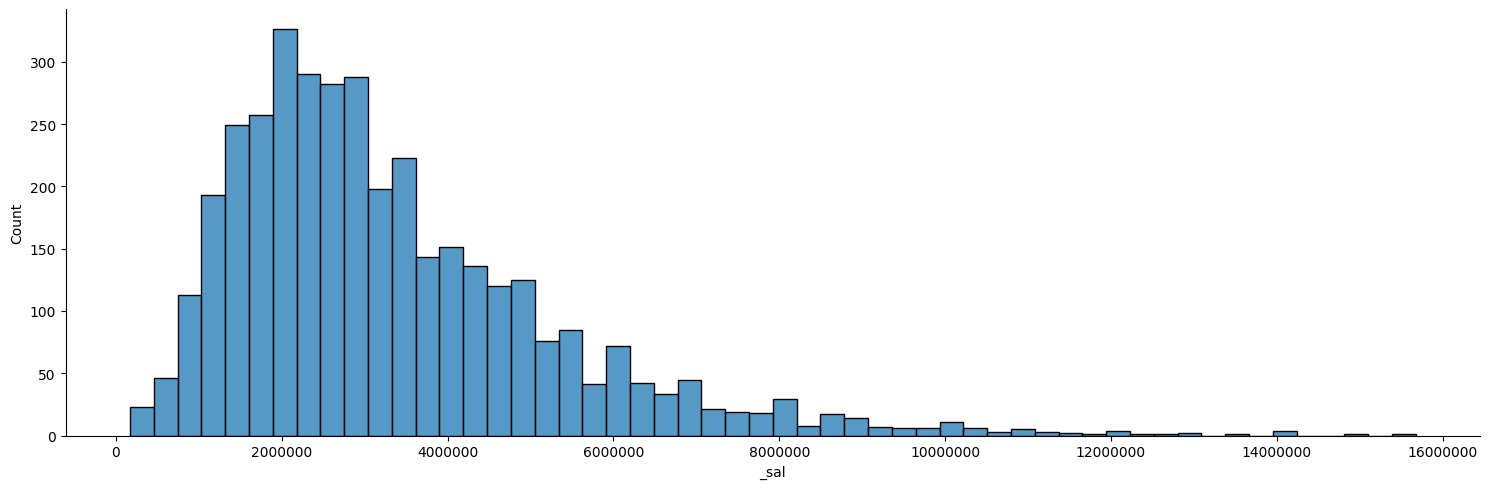

In [15]:
## Distribution of the variable to be predicted.
sns.displot(df["_sal"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') 

<Axes: xlabel='_sal'>

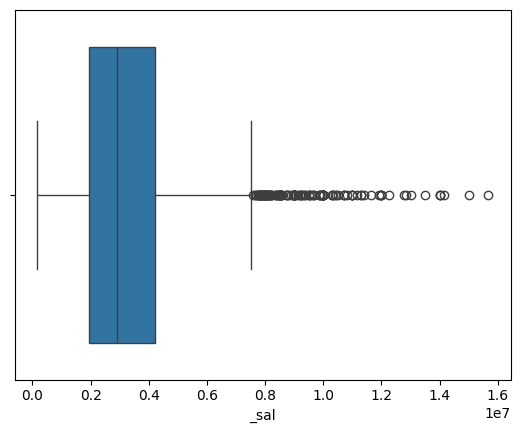

In [16]:
sns.boxplot(x=df['_sal'])

### Method SD

In [17]:
media = df["_sal"].mean()
desv_std = df["_sal"].std()
print(media, desv_std)

3317345.0622438635 1986261.9177147532


In [18]:
LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std
print(LI_DS, LS_DS)

-2641440.690900396 9276130.815388123


In [19]:
df = df[(df["_sal"] >= LI_DS) & (df["_sal"] <= LS_DS)]
df.shape

(3688, 17)

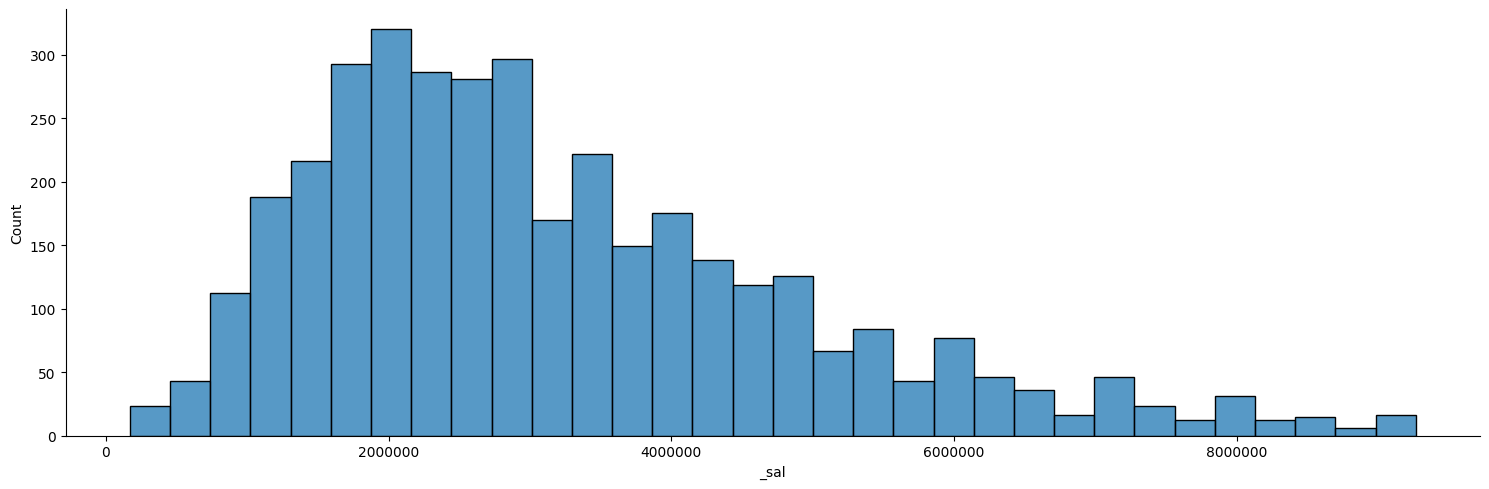

In [20]:
## Dataset clean
sns.displot(df["_sal"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') 

### Logarithmic transformation

After removing outliers using the interquartile range method (LI_DS and LS_DS), the distribution of the salary variable _sal shows marked positive asymmetry. Therefore, in order to obtain a more suitable distribution for statistical modeling and improve the performance of predictive algorithms, logarithmic transformation (np.log) is applied.

In [21]:
df['target'] = np.log1p(df['_sal'])

Text(0.5, 1.0, 'Distribución después de log-transform')

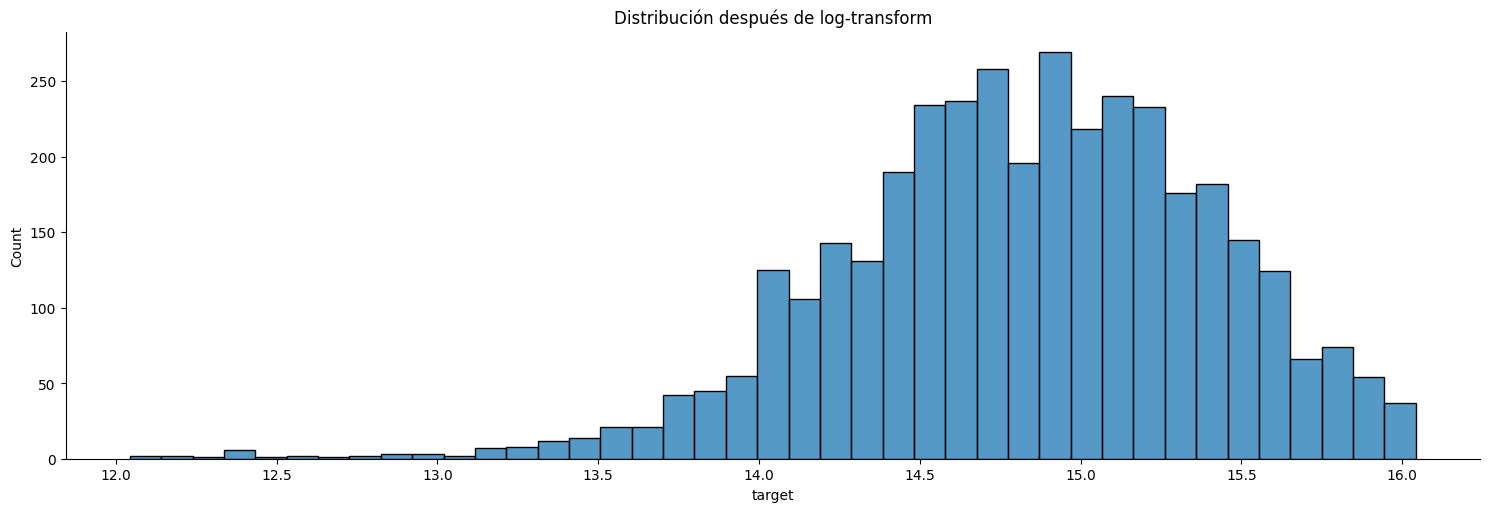

In [22]:
# Ver distribución transformada
sns.displot(df['target'], aspect=3)
plt.title('Distribución después de log-transform')

## Numeric Variables

In [23]:
df.describe()

,anos_de_experiencia,anos_en_el_puesto_actual,antiguedad_en_la_empresa_actual,cuantas_personas_tenes_a_cargo,edad,_sal,target
count,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3.688000e+03,3688.000000
mean,9.469360,4.961497,4.086768,2.261388,36.371475,3.191920e+06,14.824233
std,7.977602,57.637699,4.928351,9.087497,9.049409,1.728743e+06,0.576814
min,0.000000,0.000000,0.000000,0.000000,19.000000,1.700000e+05,12.043560
25%,3.750000,1.000000,1.000000,0.000000,30.000000,1.908774e+06,14.461972
50%,6.000000,2.000000,3.000000,0.000000,35.000000,2.800500e+06,14.845309
75%,15.000000,4.000000,5.000000,1.000000,41.000000,4.122300e+06,15.231922
max,46.000000,2023.000000,42.000000,200.000000,229.000000,9.268000e+06,16.042078


### Years of experience

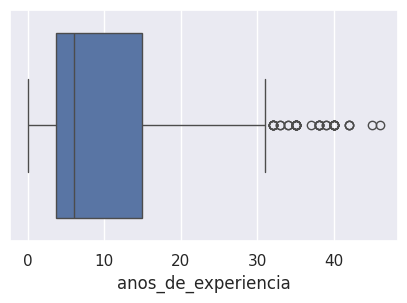

In [24]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["anos_de_experiencia"])
plt.ticklabel_format(style='plain', axis='x') 

In [25]:
media = df["anos_de_experiencia"].mean()
desv_std = df["anos_de_experiencia"].std()

LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std

Q_a_limpiar = (df[df['anos_de_experiencia']>LS_DS]).shape

print(LI_DS, LS_DS, Q_a_limpiar )


-14.463445446456632 33.402165619992424 (38, 18)


In [26]:
df = df[(df["anos_de_experiencia"] >= LI_DS) & (df["anos_de_experiencia"] <= LS_DS)]
df.shape


(3650, 18)

### Age

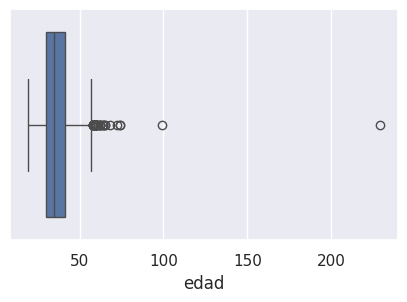

In [27]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["edad"])
plt.ticklabel_format(style='plain', axis='x') 

In [28]:
media = df["edad"].mean()
desv_std = df["edad"].std()

LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std

Q_a_limpiar = (df[df['edad']>LS_DS]).shape

print(LI_DS, LS_DS, Q_a_limpiar )

9.82864938362055 62.429432808160264 (11, 18)


In [29]:
df = df[(df["edad"] >= LI_DS) & (df["edad"] <= LS_DS)]
df.shape

(3639, 18)

### Years in the actual job

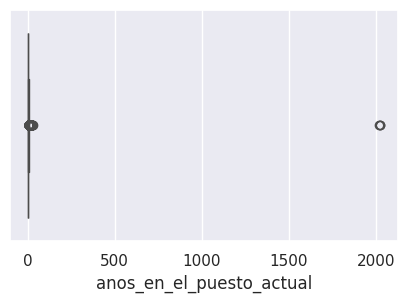

In [30]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["anos_en_el_puesto_actual"])
plt.ticklabel_format(style='plain', axis='x')


In [31]:
media = df["anos_en_el_puesto_actual"].mean()
desv_std = df["anos_en_el_puesto_actual"].std()

LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std

Q_a_limpiar = (df[df['anos_en_el_puesto_actual']>LS_DS]).shape

print(LI_DS, LS_DS, Q_a_limpiar )

-169.13460683595795 178.92960546195408 (3, 18)


In [32]:
df = df[(df["anos_en_el_puesto_actual"] >= LI_DS) & (df["anos_en_el_puesto_actual"] <= LS_DS)]
df.shape

(3636, 18)

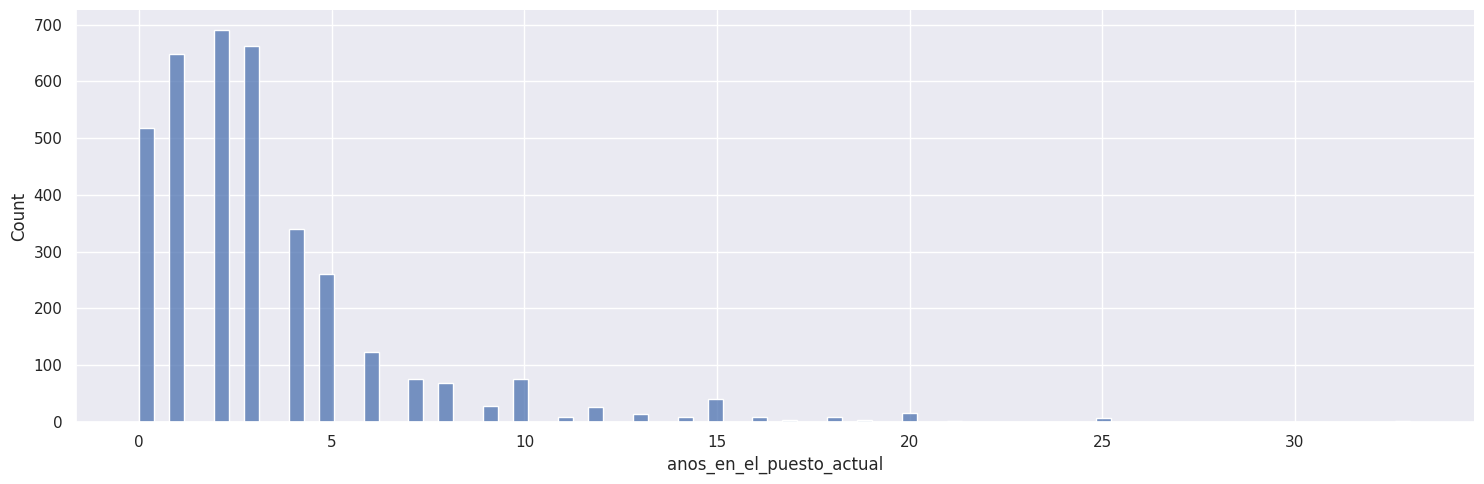

In [33]:
## Check clean dataset
sns.displot(df["anos_en_el_puesto_actual"], aspect=3)
plt.ticklabel_format(style='plain', axis='x') 

### Dependents

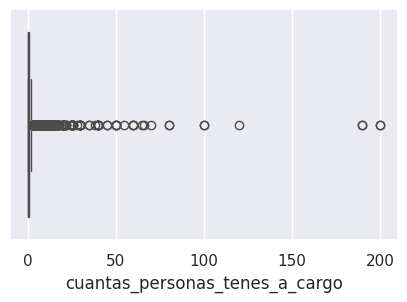

In [34]:
sns.set(rc={'figure.figsize':(5,3)})
sns.boxplot(x=df["cuantas_personas_tenes_a_cargo"])
plt.ticklabel_format(style='plain', axis='x') 

In [35]:
media = df["cuantas_personas_tenes_a_cargo"].mean()
desv_std = df["cuantas_personas_tenes_a_cargo"].std()

LI_DS = media - 3*desv_std
LS_DS =  media + 3*desv_std

Q_a_limpiar = (df[df['cuantas_personas_tenes_a_cargo']>LS_DS]).shape

print(LI_DS, LS_DS, Q_a_limpiar )


-25.11406538062777 29.57556153024273 (40, 18)


In [36]:
df = df[(df["cuantas_personas_tenes_a_cargo"] >= LI_DS) & (df["cuantas_personas_tenes_a_cargo"] <= LS_DS)]
df.shape

(3596, 18)

In [37]:
df.head(2)

,provincia,dedicacion,tipo_de_contrato,puesto,anos_de_experiencia,anos_en_el_puesto_actual,antiguedad_en_la_empresa_actual,cuantas_personas_tenes_a_cargo,edad,genero,seniority,_sal,modalidad_de_trabajo,tamanio_empresa,recibis_algun_tipo_de_bono,contas_con_beneficios_adicionales,sueldo_dolarizado,target
0,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),QA / Tester,3,0,3,0,43,Mujer Cis,Semi-Senior,2511178.0,Híbrido (presencial y remoto),De 2001a 5000 personas,No,"Abono de Internet, Capacitaciones y/o cursos",True,14.736263
1,Buenos Aires,Full-Time,Tercerizado (trabajo a través de consultora o ...,Manager / Director,10,3,3,1,59,Mujer Cis,Senior,2140000.0,100% remoto,De 51 a 100 personas,No,Nada,True,14.576317


### Correlation

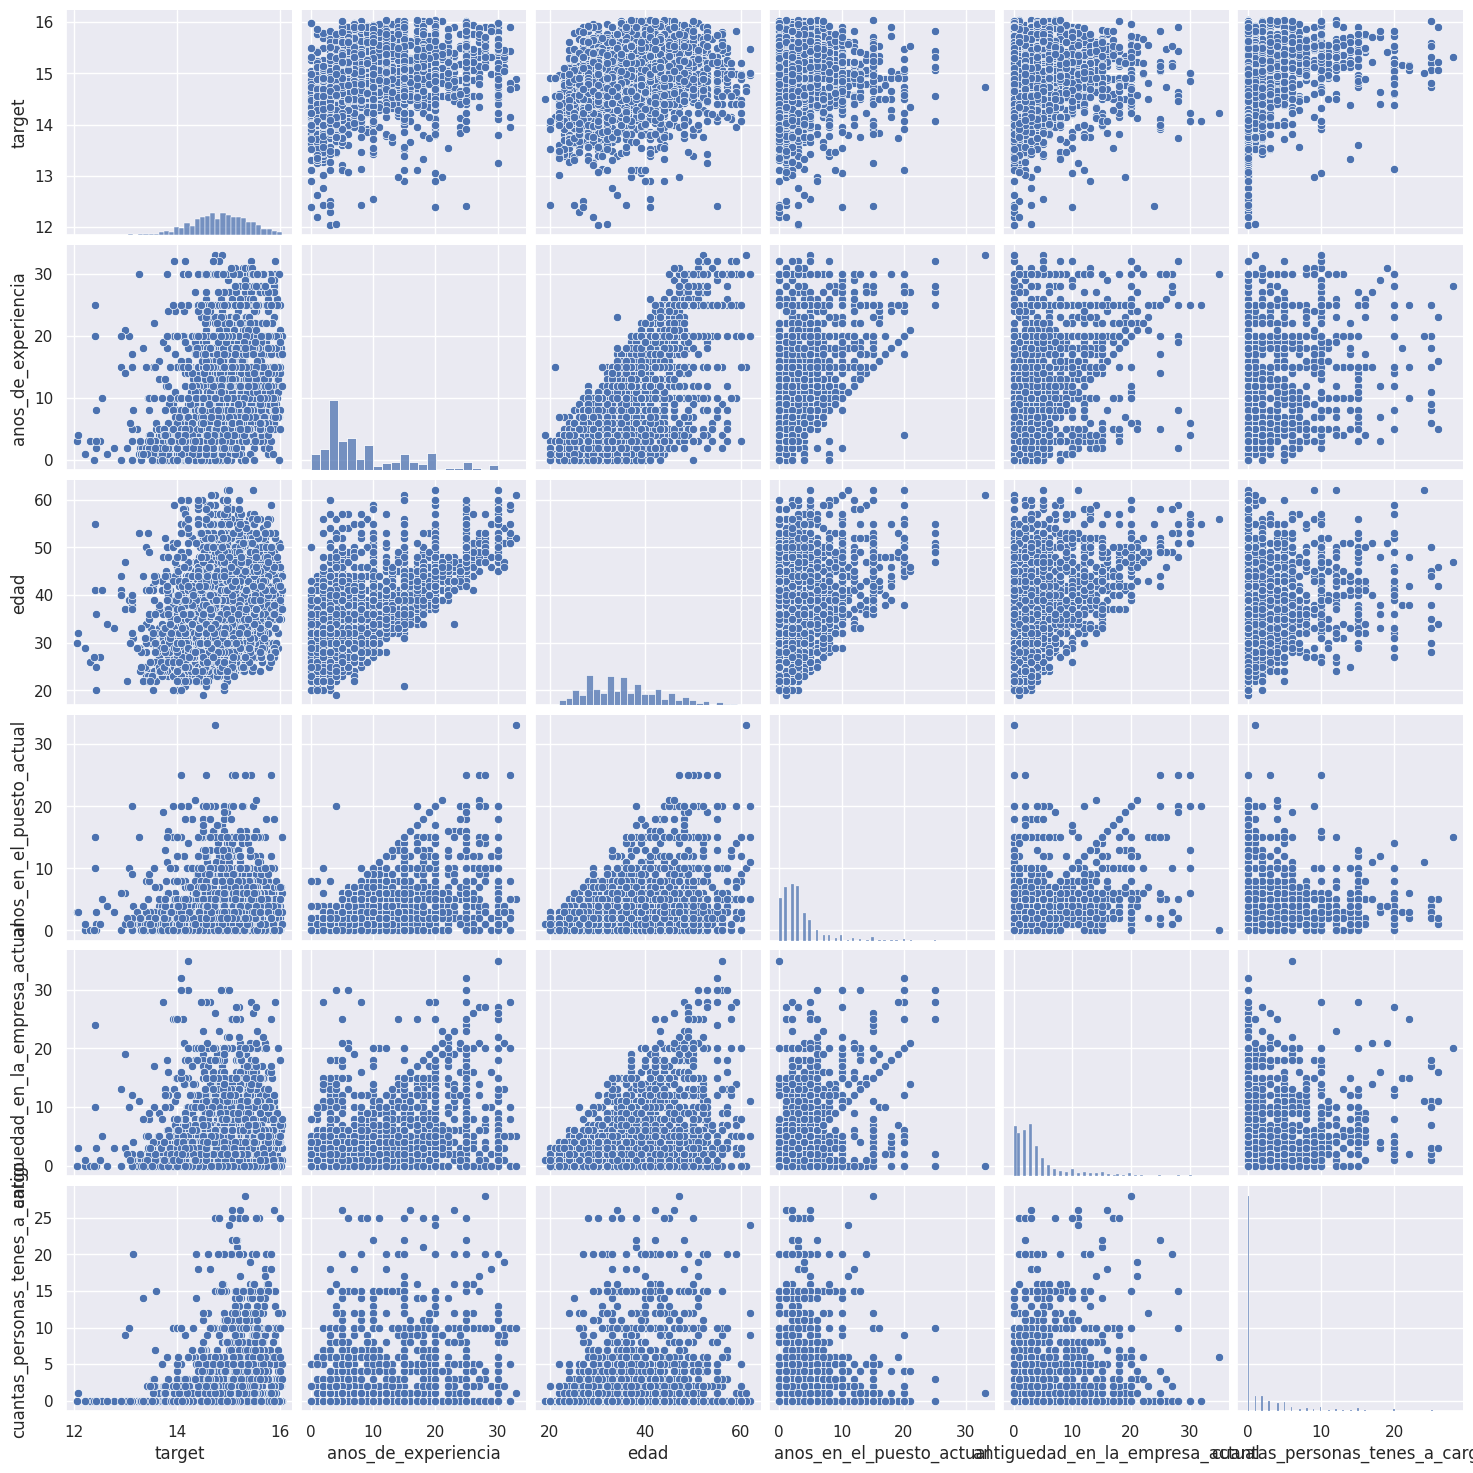

In [38]:
sns.pairplot(df[['target', 'anos_de_experiencia', 'edad', 'anos_en_el_puesto_actual', 'antiguedad_en_la_empresa_actual', 
                 'cuantas_personas_tenes_a_cargo']])

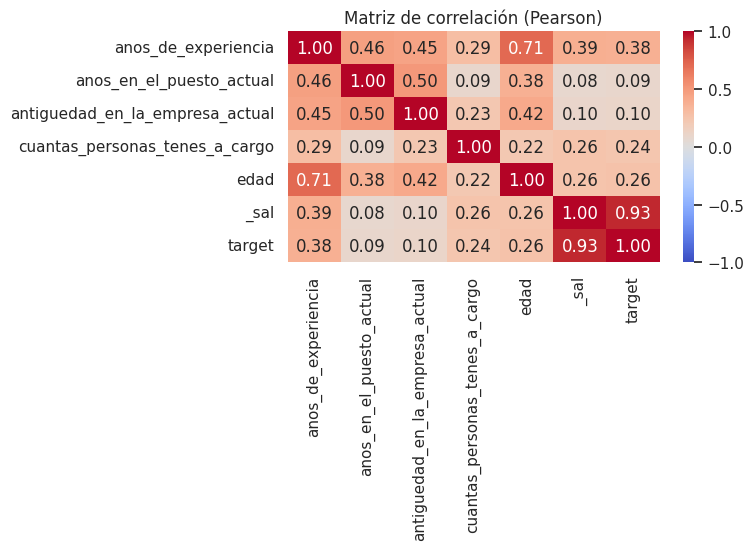

In [39]:
## Matriz de correlación

# Selecciono solo columnas numéricas y elijo método
corr = df.select_dtypes("number").corr(method="pearson")

# grafico
plt.figure(figsize=(6, 3))
sns.heatmap(
    corr,
    annot=True,          # escribe el número dentro de cada celda
    fmt=".2f",           # 2 decimales
    cmap="coolwarm",     # azul-negativo / rojo-positivo
    vmin=-1, vmax=1      # escala completa
)
plt.title("Matriz de correlación (Pearson)")
plt.show()

## Categorical Variables

### Province

In [40]:
df.provincia.value_counts()

provincia
Ciudad Autónoma de Buenos Aires    1772
Buenos Aires                        749
Córdoba                             327
Santa Fe                            264
Mendoza                             119
Entre Ríos                           61
Río Negro                            37
Misiones                             33
Tucumán                              32
Chaco                                28
Salta                                27
Neuquén                              23
Jujuy                                19
Chubut                               17
Corrientes                           17
San Luis                             15
La Rioja                             12
San Juan                             12
La Pampa                              9
Santiago del Estero                   9
Santa Cruz                            6
Tierra del Fuego                      6
Formosa                               1
Catamarca                             1
Name: count, dtype: int64

In [41]:
df.groupby("provincia")["_sal"].median().sort_values()

provincia
Formosa                            1600000.000
Chaco                              1910085.000
Salta                              1989454.750
Santiago del Estero                2100000.000
Entre Ríos                         2260000.000
Mendoza                            2268990.000
Misiones                           2281890.470
Tucumán                            2284243.000
La Rioja                           2380893.795
Corrientes                         2410000.000
Santa Cruz                         2475000.000
Chubut                             2500000.000
Córdoba                            2648134.000
San Juan                           2685500.000
Santa Fe                           2695587.935
Río Negro                          2700000.000
Buenos Aires                       2800000.000
San Luis                           2900000.000
Tierra del Fuego                   2930643.620
Ciudad Autónoma de Buenos Aires    3000000.000
Jujuy                              3000000.000
Neu

In [42]:
map_provincia_region = {
    # Región Pampeana
    "Buenos Aires": "Pampeana",
    "Ciudad Autónoma de Buenos Aires": "Pampeana",
    "Santa Fe": "Pampeana",
    "Córdoba": "Pampeana",
    "Entre Ríos": "Pampeana",
    "La Pampa": "Pampeana",

    # NOA
    "Jujuy": "NOA",
    "Salta": "NOA",
    "Tucumán": "NOA",
    "Catamarca": "NOA",
    "Santiago del Estero": "NOA",
    "La Rioja": "NOA",

    # NEA
    "Misiones": "NEA",
    "Corrientes": "NEA",
    "Chaco": "NEA",
    "Formosa": "NEA",

    # Cuyo
    "Mendoza": "Cuyo",
    "San Juan": "Cuyo",
    "San Luis": "Cuyo",

    # Patagonia
    "Neuquén": "Patagonia",
    "Río Negro": "Patagonia",
    "Chubut": "Patagonia",
    "Santa Cruz": "Patagonia",
    "Tierra del Fuego": "Patagonia"
}


In [43]:
df["region"] = df["provincia"].map(map_provincia_region)

In [44]:
df.region.value_counts()

region
Pampeana     3182
Cuyo          146
NOA           100
Patagonia      89
NEA            79
Name: count, dtype: int64

In [45]:
df.groupby("region")["_sal"].median().sort_values()

region
NEA          2153724.0
Cuyo         2326000.0
NOA          2327500.0
Patagonia    2800000.0
Pampeana     2900000.0
Name: _sal, dtype: float64

### Dedication

In [46]:
df.dedicacion.value_counts()

dedicacion
Full-Time    3438
Part-Time     158
Name: count, dtype: int64

In [47]:
df.groupby("dedicacion")["_sal"].median().sort_values()

dedicacion
Part-Time    1300000.0
Full-Time    2900000.0
Name: _sal, dtype: float64

### Type of contract

In [48]:
df.tipo_de_contrato.value_counts()

tipo_de_contrato
Staff (planta permanente)                                 2643
Contractor                                                 545
Tercerizado (trabajo a través de consultora o agencia)     280
Freelance                                                  107
Participación societaria en una cooperativa                 21
Name: count, dtype: int64

In [49]:
df.groupby("tipo_de_contrato")["_sal"].median().sort_values()

tipo_de_contrato
Freelance                                                 2000000.0
Tercerizado (trabajo a través de consultora o agencia)    2200000.0
Participación societaria en una cooperativa               2880000.0
Staff (planta permanente)                                 2900000.0
Contractor                                                3200000.0
Name: _sal, dtype: float64

In [50]:
# Crear categorías más robustas
def agrupar_contrato(tipo):
    if tipo == "Staff (planta permanente)":
        return "Staff"
    elif tipo == "Contractor":
        return "Contractor"
    elif tipo in ["Tercerizado (trabajo a través de consultora o agencia)", 
                  "Freelance"]:
        return "NoStaff_Externo"  # Agrupar tercerizados y freelance
    else:  # Cooperativa
        return "Otros"  # O eliminar si son muy pocos

df["tipo_contrato_agrupado"] = df["tipo_de_contrato"].apply(agrupar_contrato)

In [51]:
df = df[df["tipo_de_contrato"] != "Participación societaria en una cooperativa"]

### Job

In [52]:
df.puesto.value_counts()

puesto
Developer                                  1263
SysAdmin / DevOps / SRE                     408
Manager / Director                          278
Technical Leader                            266
BI Analyst / Data Analyst                   195
QA / Tester                                 182
Data Engineer                               107
Data Scientist                               84
Architect                                    84
UX Designer                                  84
Infosec                                      82
Business Analyst                             69
Recruiter                                    63
HelpDesk                                     57
Consultant                                   56
Networking                                   47
Designer                                     36
Functional Analyst                           34
Sales / Pre-Sales                            23
Scrum Master                                 21
DBA (Database Administrator)     

In [53]:
puestos_principales = [
    "Developer",
    "SysAdmin / DevOps / SRE",
    "Manager / Director",
    "Technical Leader",
    "BI Analyst / Data Analyst",
    "QA / Tester",
    "Data Engineer",
    "Data Scientist",
    "Architect",
    "UX Designer",
    "Infosec",
    "Business Analyst",
    "Recruiter",
    "Consultant",
    "HelpDesk",
    "Networking",
    "Designer",
    "Functional Analyst",
    "Sales / Pre-Sales",
    "Scrum Master",
    "DBA (Database Administrator)"]

df["puesto_agrupado"] = df["puesto"].where(
    df["puesto"].isin(puestos_principales),
    "Otros"
)


In [54]:
df.puesto_agrupado.value_counts()

puesto_agrupado
Developer                       1263
SysAdmin / DevOps / SRE          408
Manager / Director               278
Technical Leader                 266
BI Analyst / Data Analyst        195
QA / Tester                      182
Otros                            117
Data Engineer                    107
Data Scientist                    84
UX Designer                       84
Architect                         84
Infosec                           82
Business Analyst                  69
Recruiter                         63
HelpDesk                          57
Consultant                        56
Networking                        47
Designer                          36
Functional Analyst                34
Sales / Pre-Sales                 23
Scrum Master                      21
DBA (Database Administrator)      19
Name: count, dtype: int64

### Gender

In [55]:
df.genero.value_counts()

genero
Hombre Cis           2775
Mujer Cis             737
Prefiero no decir      35
No binarie             12
Queer                   7
Trans                   6
Agénero                 2
Fluido                  1
Name: count, dtype: int64

In [56]:
df.groupby("genero")["_sal"].median().sort_values()

genero
Fluido               1538090.0
Queer                1771778.0
No binarie           1895429.0
Agénero              2120415.5
Mujer Cis            2270000.0
Hombre Cis           3000000.0
Prefiero no decir    3055000.0
Trans                3225000.0
Name: _sal, dtype: float64

In [57]:
genero_grupo = [
    "Hombre Cis",
    "Mujer Cis"]

df["genero_agrupado"] = df["genero"].where(
    df["genero"].isin(genero_grupo),
    "Otros"
)

In [58]:
df.genero_agrupado.value_counts()

genero_agrupado
Hombre Cis    2775
Mujer Cis      737
Otros           63
Name: count, dtype: int64

In [59]:
df.groupby("genero_agrupado")["_sal"].median().sort_values()

genero_agrupado
Mujer Cis     2270000.0
Otros         2500000.0
Hombre Cis    3000000.0
Name: _sal, dtype: float64

### Seniority

In [60]:
df.seniority.value_counts()

seniority
Senior         1921
Semi-Senior    1196
Junior          458
Name: count, dtype: int64

In [61]:
df.groupby("seniority")["_sal"].median().sort_values()

seniority
Junior         1557972.0
Semi-Senior    2400000.0
Senior         3509000.0
Name: _sal, dtype: float64

### Working method

In [62]:
## Para ver categorías y cantidades
df.modalidad_de_trabajo.value_counts()

modalidad_de_trabajo
100% remoto                      1775
Híbrido (presencial y remoto)    1527
100% presencial                   273
Name: count, dtype: int64

In [63]:
df.groupby("modalidad_de_trabajo")["_sal"].median().sort_values()

modalidad_de_trabajo
100% presencial                  1800000.0
100% remoto                      2900000.0
Híbrido (presencial y remoto)    2903807.0
Name: _sal, dtype: float64

### Company Size

In [64]:
df.tamanio_empresa.value_counts()

tamanio_empresa
De 11  a 50  personas       603
De 201 a 500 personas       498
De 51 a 100 personas        473
De 101 a 200 personas       424
Más de 10000 personas       397
De 501 a 1000 personas      298
De 1001 a 2000 personas     276
De 2001a 5000 personas      226
De 2 a 10 personas          184
De 5001 a 10000 personas    155
1 (solamente yo)             41
Name: count, dtype: int64

In [65]:
df.groupby("tamanio_empresa")["_sal"].median().sort_values()

tamanio_empresa
1 (solamente yo)            1800000.000
De 2 a 10 personas          1928774.500
De 11  a 50  personas       2500000.000
De 51 a 100 personas        2500000.000
De 101 a 200 personas       2513719.500
De 201 a 500 personas       2810950.000
De 501 a 1000 personas      3000000.000
De 1001 a 2000 personas     3156929.625
Más de 10000 personas       3400000.000
De 5001 a 10000 personas    3400000.000
De 2001a 5000 personas      3425000.000
Name: _sal, dtype: float64

### You receive a voucher

In [66]:
df.groupby("recibis_algun_tipo_de_bono") \
  .agg(
      mediana_salario=("_sal", "median"),
      cantidad=("recibis_algun_tipo_de_bono", "size")
  ) \
  .sort_values("mediana_salario")


,mediana_salario,cantidad
recibis_algun_tipo_de_bono,,
No,2450000.0,2099
Menos de un sueldo,2600000.0,457
Un sueldo,3200000.0,498
De uno a tres sueldos,3980000.0,439
3+ sueldos,4925000.0,82


### Additional benefits

In [67]:
df.groupby("contas_con_beneficios_adicionales") \
  .agg(
      mediana_salario=("_sal", "median"),
      cantidad=("contas_con_beneficios_adicionales", "size")
  ) \
  .sort_values("mediana_salario")

,mediana_salario,cantidad
contas_con_beneficios_adicionales,,
"Abono de celular, Abono de Internet, Descuento en gimnasios / Clases de gimnasia online, Descuentos varios (Clarín 365, Club La Nación, etc), Horarios flexibles",240000.0,1
Ninguno,307000.0,1
"Abono de celular, Abono de Internet, Crédito en billeteras virtuales (Mercado Pago, Naranja X, Ualá), Vacaciones flexibles (adicionales a las reglamentarias)",400000.0,1
"Abono de celular, Capacitaciones y/o cursos, Clases de idiomas, Horarios flexibles, Licencia por nacimiento extendida, Vacaciones flexibles (adicionales a las reglamentarias), Viáticos",436600.0,1
"Clases de idiomas, Estacionamiento gratuito / subvencionado, Horarios flexibles",470000.0,1
...,...,...
"Capacitaciones y/o cursos, Descuento en gimnasios / Clases de gimnasia online, Clases de idiomas, Comidas pagas / subvencionadas, Descuentos varios (Clarín 365, Club La Nación, etc), Estacionamiento gratuito / subvencionado, Horarios flexibles, Licencia por nacimiento extendida, Guardería o pago para cubrir costo de guardería, Vacaciones flexibles (adicionales a las reglamentarias)",9000000.0,1
"Capacitaciones y/o cursos, Descuento en gimnasios / Clases de gimnasia online, Clases de idiomas, Crédito en billeteras virtuales (Mercado Pago, Naranja X, Ualá), Horarios flexibles",9000000.0,1
"Capacitaciones y/o cursos, Comidas pagas / subvencionadas, Guardería o pago para cubrir costo de guardería, Viáticos",9198000.0,1


### Dollarized salary

In [68]:
df.groupby("sueldo_dolarizado") \
  .agg(
      mediana_salario=("_sal", "median"),
      cantidad=("sueldo_dolarizado", "size")
  ) \
  .sort_values("mediana_salario")

,mediana_salario,cantidad
sueldo_dolarizado,,
False,2586024.0,2386
True,3400000.0,1189


## New Features

In [69]:
# Crear nuevas features
df['exp_por_edad'] = df['anos_de_experiencia'] / df['edad']
df['ratio_cargo'] = df['cuantas_personas_tenes_a_cargo'] / (df['anos_de_experiencia'] + 1)
df['movilidad'] = df['anos_en_el_puesto_actual'] / (df['antiguedad_en_la_empresa_actual'] + 1)

In [70]:
## En este caso tomo un modo arbitrario
# Filtramos los valores dentro del rango para la superficie total
print('Registros en df limpio:', df.shape[0])
print('Registros en df original:', df0.shape[0])
print('% Registros conservados;', df.shape[0]/df0.shape[0])

Registros en df limpio: 3575
Registros en df original: 3748
% Registros conservados; 0.9538420490928495


## Variables to consider

In [71]:
df.columns

Index(['provincia', 'dedicacion', 'tipo_de_contrato', 'puesto',
       'anos_de_experiencia', 'anos_en_el_puesto_actual',
       'antiguedad_en_la_empresa_actual', 'cuantas_personas_tenes_a_cargo',
       'edad', 'genero', 'seniority', '_sal', 'modalidad_de_trabajo',
       'tamanio_empresa', 'recibis_algun_tipo_de_bono',
       'contas_con_beneficios_adicionales', 'sueldo_dolarizado', 'target',
       'region', 'tipo_contrato_agrupado', 'puesto_agrupado',
       'genero_agrupado', 'exp_por_edad', 'ratio_cargo', 'movilidad'],
      dtype='object')

In [72]:
df = df[['dedicacion', 'tipo_contrato_agrupado','anos_de_experiencia', 'seniority', 'target','modalidad_de_trabajo',
         'tamanio_empresa','region', 'genero_agrupado', 'puesto_agrupado', 'recibis_algun_tipo_de_bono', 'sueldo_dolarizado',
        'exp_por_edad', 'ratio_cargo', 'movilidad' ]]

# Split Dataset

In [73]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

del df_train['target']
del df_val['target']
del df_test['target']

In [74]:
len(df_train), len(df_test), len(df_val)

(2145, 715, 715)

# Modelo Regresión Lineal

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
from sklearn.feature_extraction import DictVectorizer

In [77]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Eligo y entreno el modelo
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [78]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

#Hago la predicción
y_pred = model.predict(X_val)

#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score -- 0.4719695311348272

0.4719695311348272

# Modelo Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [81]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [82]:
#Hago la predicción con TEST
y_pred = dtr.predict(X_train)

#Mido el modelo
r2_score(y_train, y_pred)

0.9999058361603502

In [83]:
#Hago la predicción con VAL
y_pred = dtr.predict(X_val)

#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score -- 0.4719695311348272
# DT r2_score -- -0.027866222814827868

-0.027866222814827868

#### Decision trees parameter tuning

In [84]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
 
for depth in depths: 
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(X_train, y_train)
     
    #Hago la predicción
    y_pred = dtr.predict(X_val)
    
    #Mido el modelo
    r2 = r2_score(y_val, y_pred)

    print('%4s -> %.3f' % (depth, r2))



   1 -> 0.201
   2 -> 0.266
   3 -> 0.295
   4 -> 0.341
   5 -> 0.327
   6 -> 0.351
  10 -> 0.286
  15 -> 0.093
  20 -> 0.075
None -> -0.080


In [85]:
scores = []
 
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dtr = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=s)
        dtr.fit(X_train, y_train)
 
        #Hago la predicción y mido el modelo
        y_pred = dtr.predict(X_val)
        r2 = r2_score(y_val, y_pred)
             
        scores.append((d, s, r2))
 
columns = ['max_depth', 'min_samples_leaf', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)

In [86]:
df_scores.sort_values(by='r2', ascending=False).head()

,max_depth,min_samples_leaf,r2
5,1.0,20,0.352885
32,4.0,20,0.352885
59,10.0,20,0.352885
68,15.0,20,0.352885
50,6.0,20,0.352437


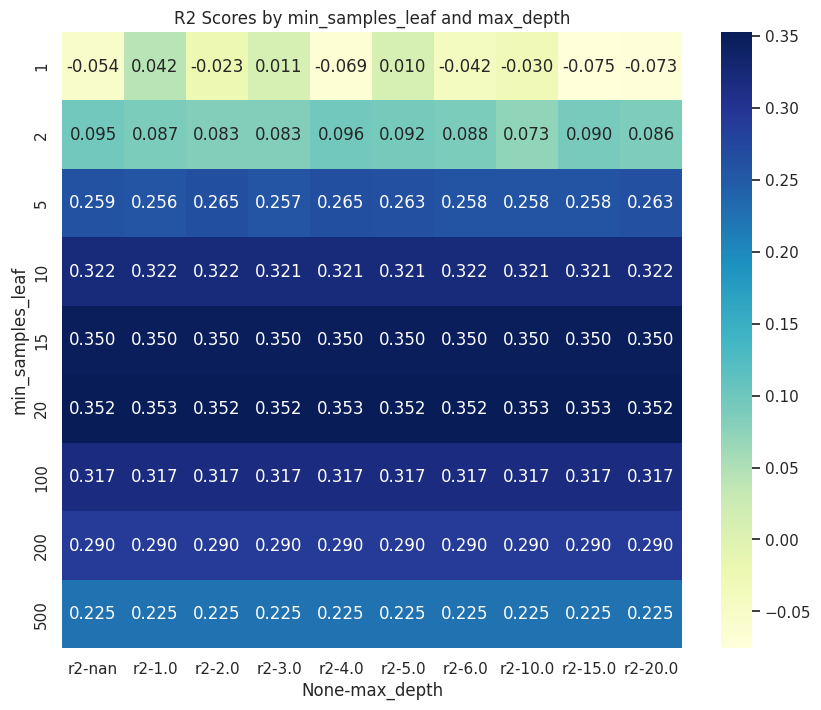

In [87]:
plt.figure(figsize=(10, 8))  # ancho x alto, podés ajustar los valores
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['r2'])
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f", cmap="YlGnBu")

plt.title("R2 Scores by min_samples_leaf and max_depth")
plt.show()

In [88]:
## Modelo con parámetros ajustados
dtr = DecisionTreeRegressor(max_depth=4, min_samples_leaf=20)
dtr.fit(X_train, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",20
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_l

In [89]:
## RL r2_score --  0.38450157849624966
# DT r2_score -- -0.04236143645844237
# DT Ajustado r2_score -- 0.280673

## Modelo Random-forest

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
rf = RandomForestRegressor(n_estimators=10, 
                            random_state=1,
                            n_jobs=-1
                           )
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

In [92]:
y_pred = rf.predict(X_val)

In [93]:
#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.38450157849624966
# DT r2_score -- -0.04236143645844237
# DT Ajustado r2_score -- 0.280673
# RF r2_score -- 0.39825800870831873

0.4352934854045455

In [94]:
scores = []
 
for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
 
        y_pred = rf.predict(X_val)
        r2 = r2_score(y_val, y_pred)
 
        scores.append((d, n, r2))
 
columns = ['max_depth', 'n_estimators', 'r2']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,r2
0,10,10,0.469796
1,10,20,0.477385
2,10,30,0.484109
3,10,40,0.485865
4,10,50,0.482375


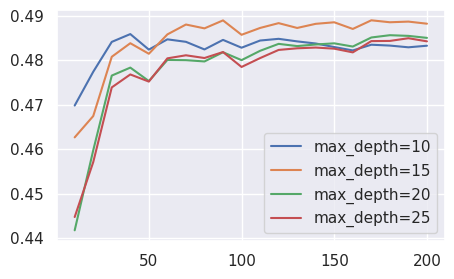

In [95]:
# Let's plot it
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
     
    plt.plot(df_subset.n_estimators, df_subset.r2,
             label='max_depth=%d' % d)
 
plt.legend()

In [96]:
rf = RandomForestRegressor(n_estimators=130,
                           max_depth = 10,
                           random_state=1,
                            n_jobs=-1
                           )
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",130
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [97]:
y_pred = rf.predict(X_val)

#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.38450157849624966
# DT r2_score -- -0.04236143645844237
# DT Ajustado r2_score -- 0.280673
# RF r2_score -- 0.39825800870831873
# RF Ajustado r2_score -- 0.4362338610423828

0.4842217789038803

In [98]:
!pip install xgboost
 
import xgboost as xgb

In [99]:
features = dv.get_feature_names_out()

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(features))
dval = xgb.DMatrix(X_val, label=y_val, feature_names=list(features))

In [100]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [101]:
y_pred = model_xgb.predict(dval)

#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.38450157849624966
# DT r2_score -- -0.04236143645844237
# DT Ajustado r2_score -- 0.280673
# RF r2_score -- 0.39825800870831873
# RF Ajustado r2_score -- 0.4362338610423828
# XGB r2_score --- 0.4500767407133842

0.44968935405502053

In [102]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [103]:
def parse_xgb_output(output):
    results = []
 
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
 
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
 
        results.append((it, train, val))
     
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [104]:
scores = {}

In [105]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
     
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist)

In [106]:
'eta=%s' % (xgb_params['eta'])
# Output: 'eta=0.3'

'eta=0.3'

In [107]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key
 
# Output: 'eta=0.3'

'eta=0.3'

In [108]:
scores

{'eta=0.3':      num_iter  train_rmse  val_rmse
 0           0     0.50060   0.52787
 1           1     0.45735   0.49313
 2           2     0.42438   0.47169
 3           3     0.40466   0.46302
 4           4     0.38842   0.45265
 ..        ...         ...       ...
 495       495     0.01394   0.44676
 496       496     0.01389   0.44679
 497       497     0.01388   0.44679
 498       498     0.01377   0.44676
 499       499     0.01365   0.44677
 
 [500 rows x 3 columns]}

In [109]:
scores['eta=0.3']

,num_iter,train_rmse,val_rmse
0,0,0.50060,0.52787
1,1,0.45735,0.49313
2,2,0.42438,0.47169
3,3,0.40466,0.46302
4,4,0.38842,0.45265
...,...,...,...
495,495,0.01394,0.44676
496,496,0.01389,0.44679
497,497,0.01388,0.44679
498,498,0.01377,0.44676


In [110]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist)

In [111]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key
# Output: 'eta=1.0'

'eta=0.05'

In [112]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist)

In [113]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [114]:
%%capture output

xgb_params = {
    'eta': 0.2, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist)

In [115]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.2'

In [116]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=500,
                  evals=watchlist)

In [117]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [118]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.05', 'eta=0.1', 'eta=0.2', 'eta=0.01'])

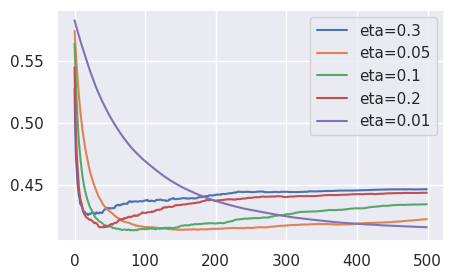

In [119]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=key)

plt.legend()

Me quedo con eta de 0.05

In [120]:
scores = {}

In [121]:
%%capture output

xgb_params = {
    'eta': 0.05, ## Mejor opción  
    'max_depth': 15,
    'min_child_weight': 1,
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [122]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=15'

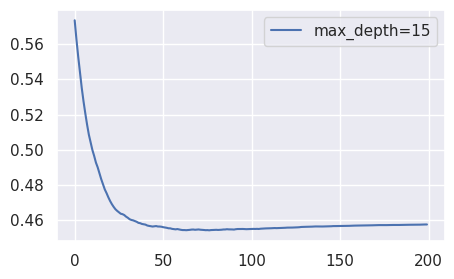

In [123]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)
 
#plt.ylim(0.8, 0.84)
plt.legend()

In [124]:
scores = {}

In [125]:
%%capture output

xgb_params = {
    'eta': 0.05, ## Mejor opción  
    'max_depth': 15, ## Mejor opción
    'min_child_weight': 30,
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [126]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

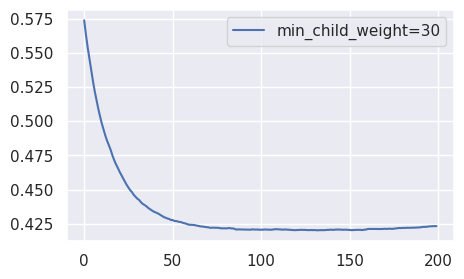

In [127]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=min_child_weight)
 
plt.legend()

In [128]:
xgb_params = {
    'eta': 0.05, ## Mejor opción  
    'max_depth': 5, ## Mejor opción
    'min_child_weight': 30, ## Mejor opción
     
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [129]:
y_pred = model_xgb.predict(dval)

#Mido el modelo
r2_score(y_val, y_pred)

# RL r2_score --  0.38450157849624966
# DT r2_score -- -0.04236143645844237
# DT Ajustado r2_score -- 0.280673
# RF r2_score -- 0.39825800870831873
# RF Ajustado r2_score -- 0.4362338610423828
# XGB r2_score --- 0.4500767407133842
# XGB Ajustado r2_score --- 0.4713607229486637

0.48662952647116076

## Selección de Modelo Final

En este análisis se probaron diferentes modelos: de regresión lineal, árbol de decisión, random forest y xgboost.

La métrica utilizada para evaluar el desempeño de los modelos fue el coeficiente de determinación R², que mide qué tan bien las variables explican la variabilidad del precio.

Se selecciona el modelo xgboost

#### Entreno el modelo final

In [130]:
df_full_train.head()

,dedicacion,tipo_contrato_agrupado,anos_de_experiencia,seniority,target,modalidad_de_trabajo,tamanio_empresa,region,genero_agrupado,puesto_agrupado,recibis_algun_tipo_de_bono,sueldo_dolarizado,exp_por_edad,ratio_cargo,movilidad
524,Full-Time,Contractor,18,Senior,16.026529,100% remoto,De 201 a 500 personas,Pampeana,Hombre Cis,Manager / Director,No,True,0.450000,0.105263,0.428571
923,Full-Time,Staff,8,Senior,15.255863,100% remoto,De 5001 a 10000 personas,Pampeana,Hombre Cis,Developer,Un sueldo,True,0.242424,0.000000,0.666667
3720,Full-Time,Staff,0,Junior,14.220976,100% remoto,De 501 a 1000 personas,Pampeana,Hombre Cis,Developer,Un sueldo,False,0.000000,0.000000,0.000000
1649,Full-Time,Staff,15,Senior,15.803385,Híbrido (presencial y remoto),De 51 a 100 personas,Pampeana,Hombre Cis,Manager / Director,De uno a tres sueldos,False,0.357143,0.437500,0.363636
1744,Full-Time,Staff,2,Junior,13.969872,100% remoto,De 2 a 10 personas,Pampeana,Hombre Cis,Business Analyst,No,False,0.074074,0.666667,0.666667


In [131]:
df_full_train = df_full_train.reset_index(drop=True)

In [132]:
y_full_train = df_full_train.target.values

In [133]:
del df_full_train['target']

In [134]:
dicts_full_train = df_full_train.to_dict(orient='records')
 
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
 
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [135]:
feature_names = list(dv.get_feature_names_out())

In [136]:
feature_names = list(dv.get_feature_names_out())
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=feature_names)
 
dtest = xgb.DMatrix(X_test, feature_names=feature_names)

In [137]:
xgb_params = {
    'eta': 0.05, ## Mejor opción  
    'max_depth': 5, ## Mejor opción
    'min_child_weight': 30, ## Mejor opción
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
 
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
 
model_xgb = xgb.train(xgb_params,dfulltrain, num_boost_round=100)

In [138]:
y_pred = model_xgb.predict(dtest)

#Mido el modelo
r2_score(y_test, y_pred)

# RL r2_score --  0.38450157849624966
# DT r2_score -- -0.04236143645844237
# DT Ajustado r2_score -- 0.280673
# RF r2_score -- 0.39825800870831873
# RF Ajustado r2_score -- 0.4362338610423828
# XGB r2_score --- 0.4500767407133842
# XGB Ajustado r2_score --- 0.4713607229486637

0.4548471406844241

In [139]:
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred)

print('Real      : ', y_test_real[:5].astype(int))
print('Prediccion: ', y_pred_real[:5].astype(int))

Real      :  [3099999 1865641 4599999 1400000 3499999]
Prediccion:  [2661196 1657347 3985899 1774112 4195327]


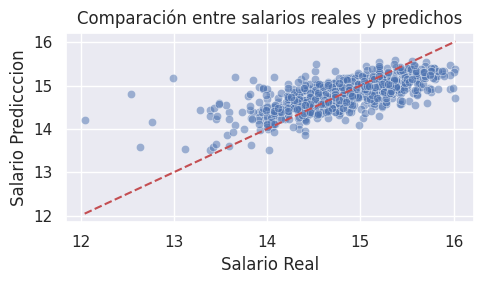

In [140]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Línea ideal: donde y = x (predicción perfecta)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Salario Real")
plt.ylabel("Salario Predicccion")
plt.title("Comparación entre salarios reales y predichos")
plt.grid(True)
plt.tight_layout()
plt.show()

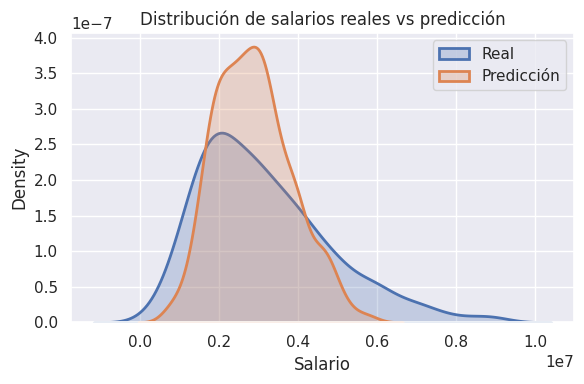

In [141]:
plt.figure(figsize=(6,4))

sns.kdeplot(y_test_real, label='Real', fill=True, linewidth=2)
sns.kdeplot(y_pred_real, label='Predicción', fill=True, linewidth=2)

plt.title('Distribución de salarios reales vs predicción')
plt.xlabel('Salario')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [142]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_real, y_pred_real)
rmse = np.sqrt(mse)

rmse

np.float64(1301514.0683073848)